In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dkf_df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\GGE6102\DKF.csv')

gnss_df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\GGE6102\Data_Sept_F180_Combined.csv')

ins_df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\GGE6102\INS.csv')

df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\GGE6102\UKF.csv')

output = pd.DataFrame(columns = ['time', 'gnss', 'ins', 'dkf'])


In [ ]:
t = 0
for itx, row in dkf_df.iterrows():

    if t < 3445:
        ukf_x = float(df.iloc[t, 0])
        dkf = float(row['X']) - ukf_x
        ins = float(ins_df.iloc[t, 1]) - ukf_x
        gnss = float(gnss_df.iloc[t, 3]) - ukf_x
        t += 1
    
        output = output.append({"time":t, "gnss": gnss, "ins": ins, "dkf": dkf}, ignore_index = True)

    else:
        output.to_csv('diff.csv')


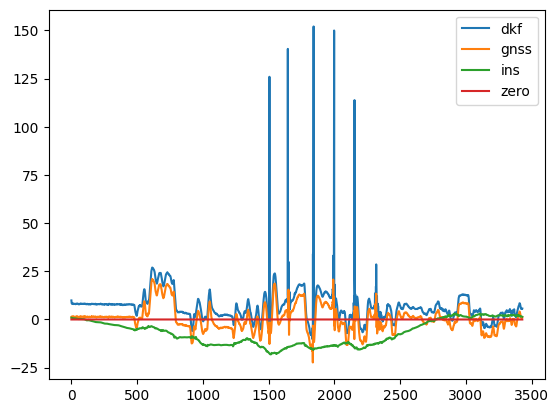

In [11]:
df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\GGE6102\diff.csv')

df['zero'] = 0

df.plot(y=["dkf","gnss","ins", 'zero'])

plt.show()

In [12]:
mean_df = df[['gnss','dkf','ins']].mean()

mean_df.head(5)

gnss    0.679810
dkf     6.674293
ins    -7.105823
dtype: float64